# Machine Learning
- Supervised and unsupervised learning
- Avoiding overfitting by using train/test
- Bayesian methods
- Concept of K-means
- Concept of decision trees
- SVM (Support Vector Machine)

## Supervised learning

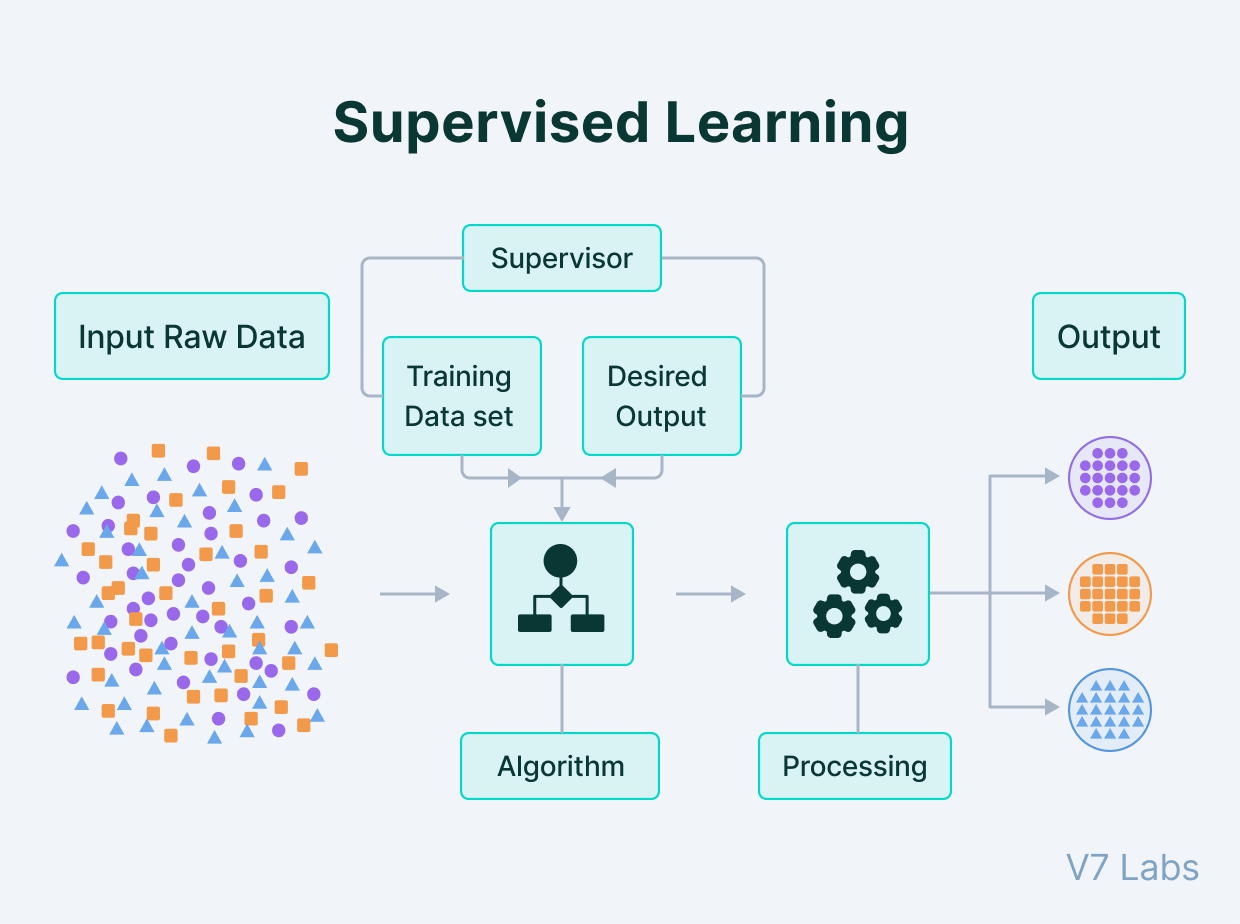

## K - Fold Cross Validation
Steps:
1. Split your data into K Randomly-assigned segments
2. Reserve one segment as your test data
3. Training on each of the remaining K-1 segments and measure their performance against of test set.
4. Take the average of the K-1 R-squared scores.

### Using train/test to prevent overfitting of a polynomial regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

In [3]:
np.random.seed(2)

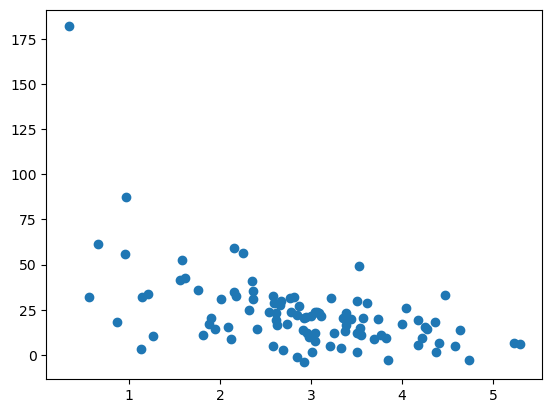

In [4]:
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100)/ pageSpeeds
scatter(pageSpeeds, purchaseAmount)

In [7]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

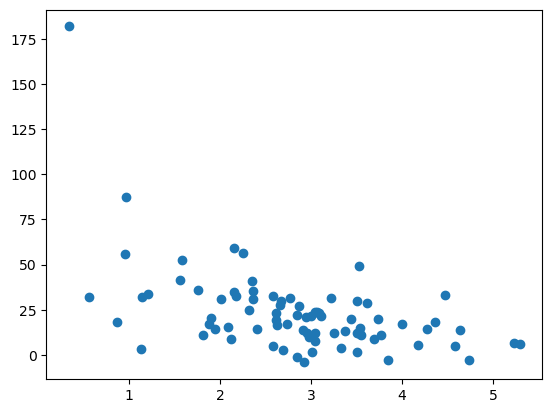

In [8]:
scatter(trainX, trainY)

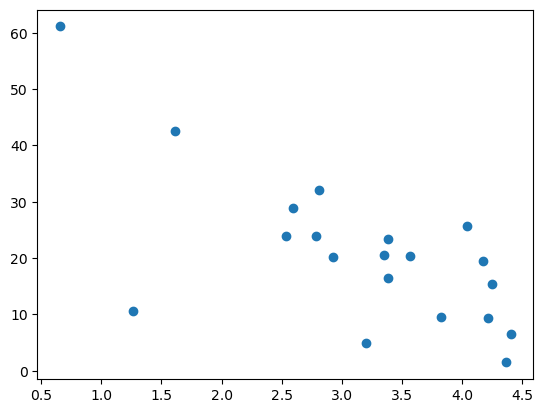

In [9]:
scatter(testX, testY)

In [16]:
#fit our 8th degree polynomial
x = np.array(trainX)
y = np.array(trainY)
p4 = np.poly1d(np.polyfit(x, y, 8))

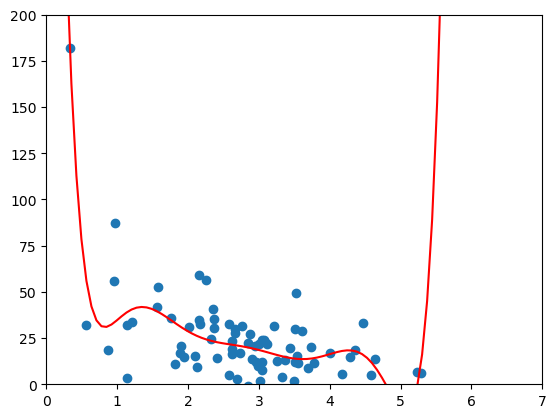

In [17]:
xp = np.linspace(0, 7, 100) #Vectoriza (start, stop, num=50) 50 points default
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c="r")
plt.show()
#Overfitting

In [12]:
testX = np.array(testX)
testY = np.array(testY)

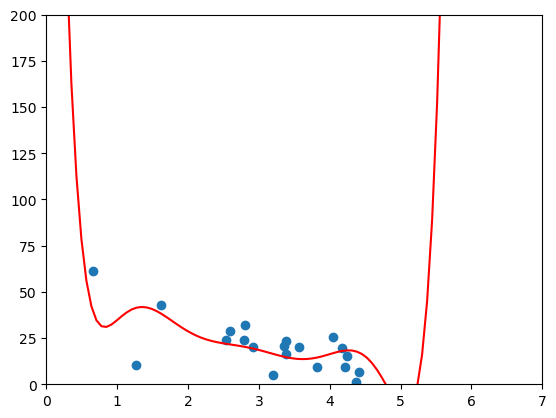

In [13]:
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(testX, testY)
plt.plot(xp, p4(xp), c="r")
plt.show()

### Librería SKlearn

## K-Means Clustering
It's an unsupervised... (pics on phone)

## Clustering people based on income and age

In [1]:
from numpy import random, array

In [7]:
#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range(k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0),
                     random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random

In [9]:
data = createClusteredData(100, 5)
model = KMeans(n_clusters = 5)

In [10]:
# Scaling the data to normalize it. Important for good results
model = model.fit(scale(data))

/home/nesmv/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


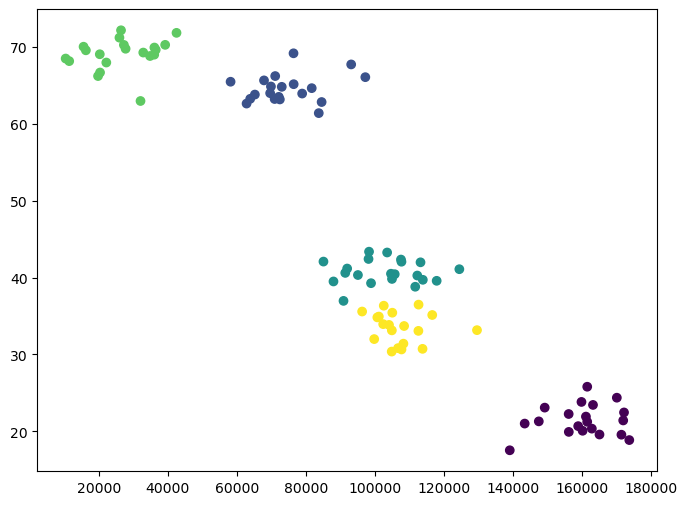

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:, 1], c=model.labels_.astype(float))
plt.show()

# Measuring entropy
So Entropy, just like it is in physics and thermodynamics, is a measure of a dataset's disorder of how same or different the dataset is.

So imagine we have a dataset of different classifications, for example, animals. Let's say I have a bunch of animals that I have classified by species. Now, if all of the animals in my dataset are an iguana, I have very low entropy because they're all the same. But if every animal in my dataset is a different animal, I have iguanas and pigs and sloths and who knows what else, then I would have a higher a entropy because there's more disorder in my dataset.

Entropy is just a way of quantifying that sameness or difference throughout my data. So an entropy of 0 implies all the classes in the data are the same, whereas if everything is different, I would have a high entropy. and something in between would be a number in between. Entropy just describes how same or different the things in a dataset are.

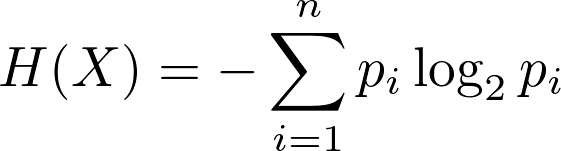

pi represents the proportion of the data labeled for each class.

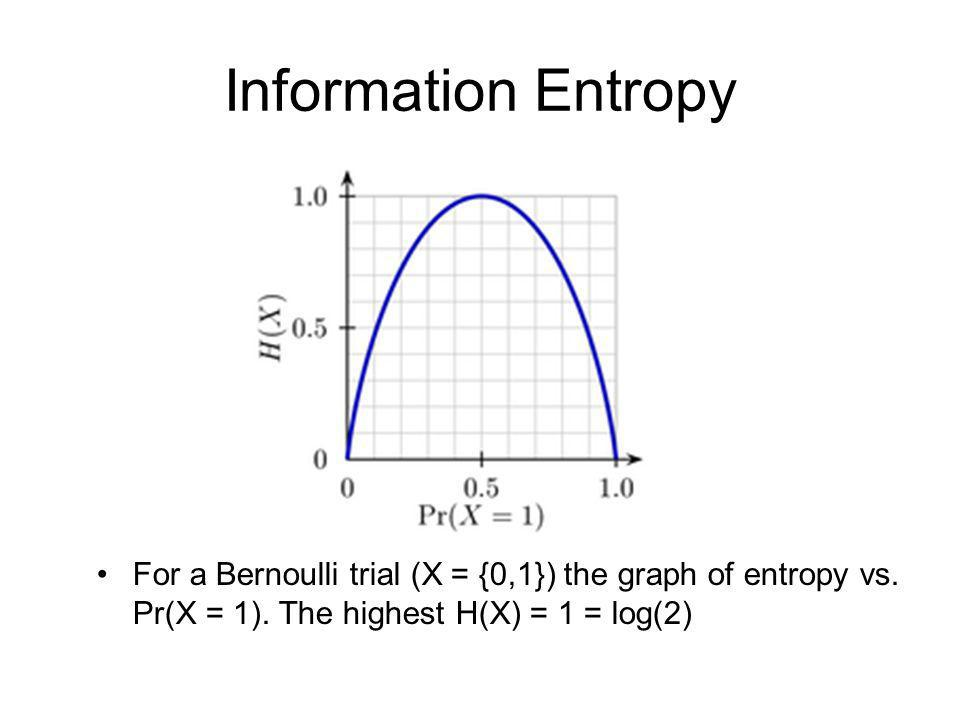 

The concept is very simple. It's just a measure of how disordered your dataset, how same or different the things in your data are.

## Decision Trees
Believe or not... given a set of training data, you can actually get python to generate a flowchart for you to make a decision. So if you have something you're a trying to predict on some classification, you can use a decision tree to actually look at multiple attibutes that you can decide upon at each level in the flowchart.
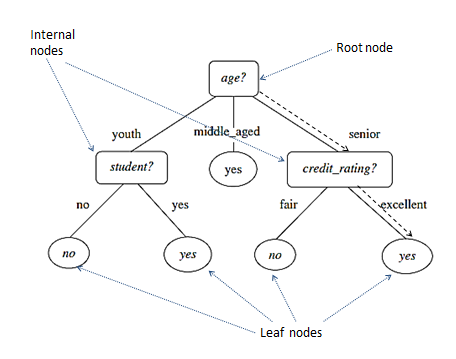

ID3 (Iterative Dichotomiser 3). It goes down the tree, it just picks the attribute that will minimize entropy at that point. Now thar might not actually result in an optimal tree that minimizes the number of choices that you have to make, but it will result in a tree that works, given the data you gave it.

Now one problem with decision trees is that are very prone to overfitting, so you can end up with a decision tree that works beautifully for the data that you trained it on, but it might not be that great for actually predicting the correct classification for new people that it hasn't seen before. Decision trees are all about arriving at the right decision for the training data thatyou gave it, but maybe you didn't really take into account the right attributes, maybe you didn't give it enough of a representative sample of people to learn from. This can result in real problems.

So to combate this issue, we use a technique called Random Forests, where the idea is that we sample the data that we train on, in different ways, for multiple different decicion trees. Each decision tree takes a different random sample from our set training data and constructs a tree from it. Then each resulting tree can vote on the right result.

The basic idea es that we have multiple trees, a forest oftrees if you will, each that uses a random subsample of the data that we hace to train on. Then each of these trees can vote on the final result, and that will help us cambat overfitting for a given set training data.

# Decisioon trees - predicting hiring decisions using Python

In [3]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import export_graphviz

In [4]:
file = "/home/nesmv/Documentos/10mo Semestre/Analisis y ML/Datasets/PastHires.csv"
file

'/home/nesmv/Documentos/10mo Semestre/Analisis y ML/Datasets/PastHires.csv'

In [5]:
df = pd.read_csv(file, header = 0)
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [6]:
change = {"Y": 1, "N": 0}
df["Hired"] = df["Hired"].map(change)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,1
1,0,N,0,BS,Y,Y,1
2,7,N,6,BS,N,N,0
3,2,Y,1,MS,Y,N,1
4,20,N,2,PhD,Y,N,0


In [7]:
df["Employed?"] = df["Employed?"].map(change)
df["Top-tier school"] = df["Top-tier school"].map(change)
df["Interned"] = df["Interned"].map(change)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,BS,0,0,1
1,0,0,0,BS,1,1,1
2,7,0,6,BS,0,0,0
3,2,1,1,MS,1,0,1
4,20,0,2,PhD,1,0,0


In [8]:
otherChange = {"BS" : 0, "MS" : 1, "PhD" : 2}
df["Level of Education"] = df["Level of Education"].map(otherChange)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [9]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Next, we construct our vector which is assingned what we're trying to predict, that is our Hired column:

In [10]:
y = df["Hired"]
X = df[features]
dt = tree.DecisionTreeClassifier()

In [11]:
dt = dt.fit(X,y)

In [12]:
#pip install pydot
#pip install graphviz
#pip install pydotplus

In [13]:
from IPython.display import Image, display
# six provides several functions to assist in classifying string data
#six.StringIO: This is a fake file object for textual data
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
#import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
dot_data = StringIO()

In [15]:
tree.export_graphviz(dt, out_file = dot_data, feature_names = features,
                     special_characters = True)

In [16]:
G = pydot.Dot(graph_type = "digraph")

In [17]:
for i in features:
    #Add node for each file and dile it with orange color
    node = pydot.Node(i,style = "filled", fillcolor = "orange")
    G.add_node(node)
    
    #Add edge between directory/subdirectory and file
    edge = pydot.Edge("/", i)
    G.add_edge(edge)

In [18]:
im = Image(G.create_png())

FileNotFoundError: [Errno 2] "dot" not found in path.

In [19]:
display(im)

NameError: name 'im' is not defined

# TAREA: 
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 

# Ensamble learning - Using a random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=10) # num. of trees in the forest
rfc = rfc.fit(X,y)

In [21]:
rfc

RandomForestClassifier(n_estimators=10)

In [22]:
# Predict employment of a employed 10-year veteran
print(rfc.predict([[10,1,4,0,0,0]]))

[1]


/home/nesmv/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# And an unemployed 10-year veteran
print()

# Support vector machine
* SVM is a supervised learning technique (training data) [KMeans is unsupervised]
* SVM is a very advanced way of clustering or classifying higher dimensional data.
* SVM is a fancy name for what actually is a fancy concept. SVM works well classifying higher dimensional data (lots of different features). SVM divide the data (mathematically, these support vectors define hyperplanes).
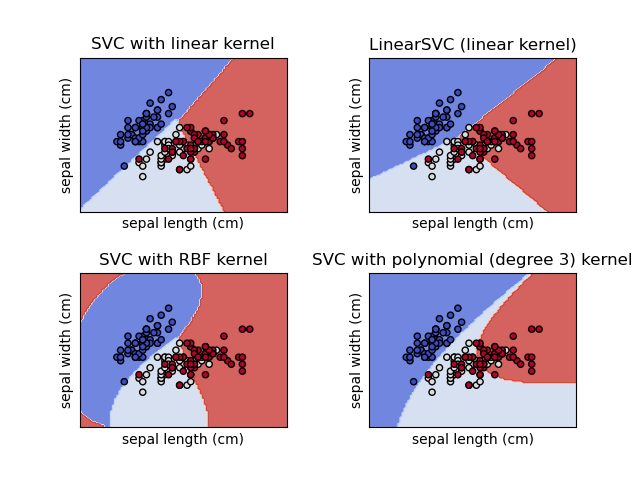

## Using a SVM to cluster people

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random, array

In [11]:
# Create fake income/age clusters for N people in k Clusters
def createClusteredData(N,k):
    np.random.seed(2)
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range(k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0),
                     np.random.normal(ageCentroid,2.0)])
            y.append(i)
        X = array(X)
        y = array(y)
        return X, y

In [12]:
%matplotlib inline
from pylab import *

In [13]:
(X, y) = createClusteredData(100, 5)

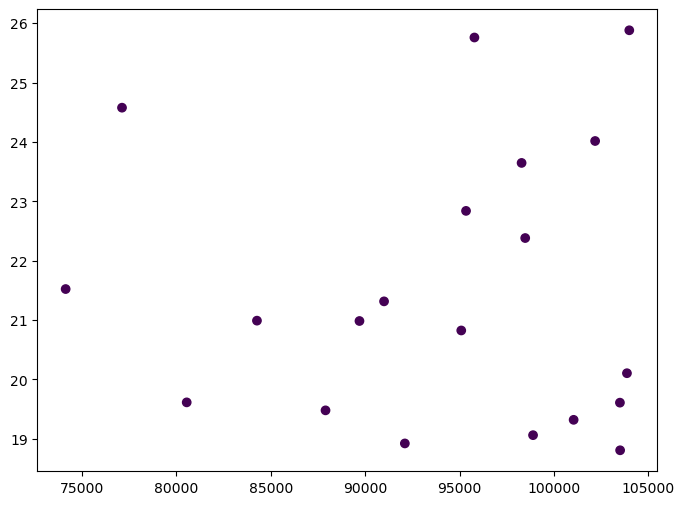

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c = y.astype(float))
plt.show()

In [58]:
X

array([[7.71171214e+04, 2.45768532e+01],
       [8.05447265e+04, 1.96128169e+01],
       [1.03507897e+05, 1.88057354e+01],
       [8.78995602e+04, 1.94782964e+01],
       [1.03993623e+05, 2.58807276e+01],
       [9.88944763e+04, 1.90604607e+01],
       [1.03869666e+05, 2.01039922e+01],
       [9.82877774e+04, 2.36463140e+01],
       [9.10003729e+04, 2.13143621e+01],
       [8.96980035e+04, 2.09834433e+01],
       [1.01044787e+05, 1.93187535e+01],
       [9.50908627e+04, 2.08239435e+01],
       [9.21025323e+04, 1.89210870e+01],
       [8.42669101e+04, 2.09893212e+01],
       [9.57885128e+04, 2.57590452e+01],
       [7.41314066e+04, 2.15217646e+01],
       [1.02183528e+05, 2.40155793e+01],
       [1.03497654e+05, 1.96078842e+01],
       [9.84791800e+04, 2.23810167e+01],
       [9.53440004e+04, 2.28383351e+01]])

In [15]:
#We use SVM with a linear kernel
# C is just an error penalty term that you can adjust; it's 1 by default
from sklearn import svm, datasets

In [21]:
C = 1.0
svc = svm.SVC(kernel='linear', C = C).fit(X,y)

ValueError: The number of classes has to be greater than one; got 1 class

In [20]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0,250000, 10),
                        np.arange(10, 70, 0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.figure(figsize=(8,6))
    Z = Z.reshape(xx.shape)
    plt.countourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = y.astype(float))
    plt.show()
    
plotPredictions(svc)

NameError: name 'svc' is not defined

In [22]:
# If you want to not just visualize the results 
svc.predict([[200000, 40]]) # Cluster 5th

NameError: name 'svc' is not defined

In [ ]:
svc.predict([[50000, 65]])